In [1]:
import pandas as pd
df=pd.read_csv('CityTempsLatLng.csv', nrows=4000,index_col='date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df
df.index = pd.DatetimeIndex(df.index).to_period('D')
df

Shape of data (4000, 6)


,Region,Country,City,AvgTemperature,lat,lng
date,,,,,,
1995-01-01,Africa,Algeria,Algiers,64.2,36.7764,3.0586
1995-01-02,Africa,Algeria,Algiers,49.4,36.7764,3.0586
1995-01-03,Africa,Algeria,Algiers,48.8,36.7764,3.0586
1995-01-04,Africa,Algeria,Algiers,46.4,36.7764,3.0586
1995-01-05,Africa,Algeria,Algiers,47.9,36.7764,3.0586
...,...,...,...,...,...,...
2005-12-23,Africa,Algeria,Algiers,44.6,36.7764,3.0586
2005-12-24,Africa,Algeria,Algiers,43.9,36.7764,3.0586
2005-12-25,Africa,Algeria,Algiers,48.0,36.7764,3.0586


<AxesSubplot:xlabel='date'>

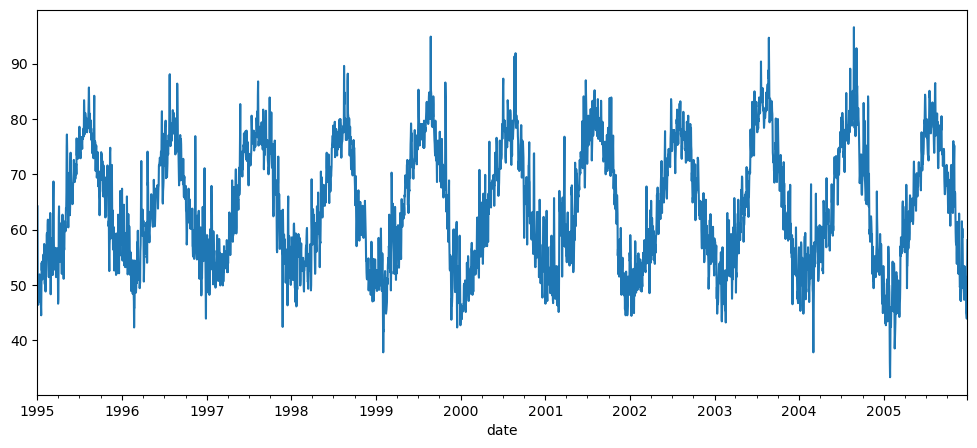

In [2]:
df['AvgTemperature'].plot(figsize=(12,5))


In [3]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AvgTemperature'])

1. ADF :  -3.431025904820841
2. P-Value :  0.009945590421512314
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression: 3985
5. Critical Values :
	 1% :  -3.431992036963141
	 5% :  -2.862265562109333
	 10% :  -2.567156224565458


In [4]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemperature'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20348.964, Time=2.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30348.878, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20719.099, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26231.465, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44769.423, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=20469.178, Time=1.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20695.898, Time=2.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=20348.845, Time=3.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20347.855, Time=3.31 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20567.450, Time=0.52 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=20349.061, Time=4.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20720.382, Time=0.49 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=20506.486, Time=0.82 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=20340.033, Time=3.00 sec
 ARIMA(5,0,2)(0,0,0

In [5]:
print(df.shape)
train=df.iloc[:-730]
test=df.iloc[-730:]
print(train.shape,test.shape)

(4000, 6)
(3270, 6) (730, 6)


In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
train['AvgTemperature']

date
1995-01-01    64.2
1995-01-02    49.4
1995-01-03    48.8
1995-01-04    46.4
1995-01-05    47.9
              ... 
2003-12-24    47.5
2003-12-25    48.8
2003-12-26    47.2
2003-12-27    46.7
2003-12-28    49.6
Freq: D, Name: AvgTemperature, Length: 3270, dtype: float64

In [8]:
model=ARIMA(train['AvgTemperature'],order=(4,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AvgTemperature   No. Observations:                 3270
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -8312.906
Date:                Tue, 02 May 2023   AIC                          16641.811
Time:                        10:45:05   BIC                          16690.552
Sample:                    01-01-1995   HQIC                         16659.266
                         - 12-28-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4246     69.511      0.927      0.354     -71.814     200.663
ar.L1          0.7374      0.041     18.068      0.000       0.657       0.817
ar.L2          0.7169      0.059     12.240      0.000       0.602       0.832
ar.L3         -0.5994      0.040    -14.997      0.000      -0.678      -0.521
ar.L4          0.1449      0.022      6.607      0.000       0.102       0.188
ma.L1          0.1144      0.038      3.047      0.002       0.041       0.188
ma.L2         -0.7903      0.030    -26.663      0.000      -0.848      -0.732
sigma2         9.4373      0.164     57.558      0.000       9.116       9.759
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               858.09
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.46
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

<AxesSubplot:>

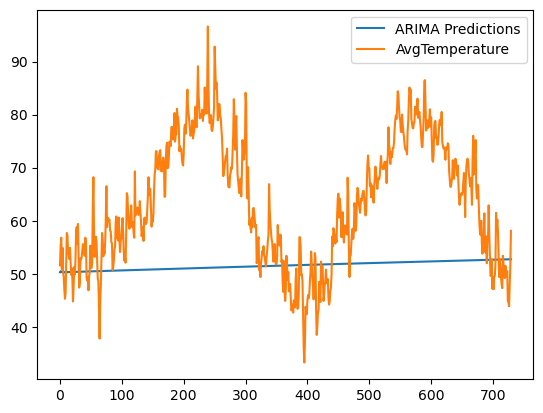

In [10]:
pred_series = pred.reset_index(drop=True)
newtest = test.reset_index()
newtest['NewTemps'] = pred_series
pred_series.plot(legend=True)
newtest['AvgTemperature'].plot(legend=True)